<a href="https://colab.research.google.com/github/elinteerie/Pytorch/blob/main/Pytorch_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn


#Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

#Import Matplot lib for Visuals
import matplotlib.pyplot as plt

print(f' Pytorch Vrsion: {torch.__version__}')

 Pytorch Vrsion: 1.12.1+cu113


In [2]:
## Working with FashionMNIST

train_data = datasets.FashionMNIST(root ='data', train = True,
                                   download = True, transform = ToTensor(),
                                   target_transform=None)


test_data = datasets.FashionMNIST(root ='data', train = False,
                                   download = True, transform = ToTensor(),
                                   )

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
### Explore Dataset 

image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [4]:
image.shape, label

(torch.Size([1, 28, 28]), 9)

In [5]:
len(train_data), len(train_data.targets), len(test_data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [6]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
class_names = train_data.classes

In [8]:
len(class_names)

10

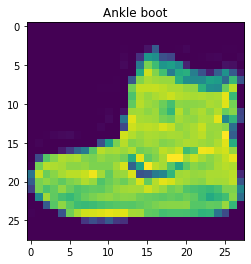

In [9]:
import matplotlib.pyplot as plt
plt.imshow(image.squeeze());
plt.title(class_names[label]);

###Prepare Data Loader

In [10]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_loader = DataLoader(train_data, batch_size =BATCH_SIZE, shuffle = True)

test_dataloader = DataLoader(test_data, batch_size = BATCH_SIZE, shuffle = False)

In [11]:
len(train_loader), len(test_dataloader)

(1875, 313)

In [12]:
train_features_batch, train_label_batch = next(iter(train_loader))

In [13]:
train_features_batch.shape

torch.Size([32, 1, 28, 28])

Image size: torch.Size([1, 28, 28])
Label: 9, label size: torch.Size([])


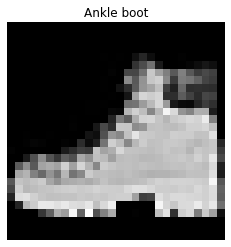

In [14]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_label_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

In [15]:
flatten_model = nn.Flatten()

In [16]:
image.shape

torch.Size([1, 28, 28])

In [17]:
flatten_model(image).shape

torch.Size([1, 784])

In [18]:
train_features_batch[0].shape

torch.Size([1, 28, 28])

In [19]:
output = flatten_model(train_features_batch[0])

In [20]:
output.shape

torch.Size([1, 784])

In [21]:
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape: int, hidden_unit:int, output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(nn.Flatten(),
                                     nn.Linear(in_features=input_shape, out_features=hidden_unit),
                                     nn.Linear(in_features=hidden_unit, out_features=output_shape))
  def forward(self, x):
    return self.layer_stack(x)

In [22]:
input_shape = 784 # 28 * 28
hidden_units = 10
output_shape = len(class_names)

In [23]:
torch.manual_seed(42)
model_0 = FashionMNISTModelV0(input_shape = input_shape, 
                              hidden_unit =hidden_units,
                              output_shape=output_shape).to('cpu')

In [24]:
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [25]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 419 kB 7.5 MB/s 


In [26]:
from torchmetrics import Accuracy, Precision

In [27]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr = 0.1)
accuracy = Accuracy()
precision = Precision()

### Create a Training Loop

In [44]:
from tqdm import tqdm

torch.manual_seed(42)

#Creating a Training Loop

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch} \n--')
  train_loss = 0
  ##Training
  ### Train Batches Loop
  for batch, (X, y) in enumerate(train_loader):
    model_0.train()
    #Forward Pass
    y_pred = model_0(X)

    ##Calculate the loss per batch
    loss = loss_fn(y_pred, y)
    acc = accuracy(y_pred, y)
    train_loss +=loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    ##Print out what's going on
    if batch % 400 == 0:
      print(f' {batch} -- {loss} -- {acc} ')
  train_loss /= len(train_loader)


  ## testing loop
  test_losses = []
  test_accs = []
  model_0.eval()
  with torch.inference_mode():
    for i, (b, c) in enumerate(test_dataloader):
      #forward pass

      test_pred = model_0(b)

      test_loss = loss_fn(test_pred, c)
     
      test_acc = accuracy(test_pred, c)

      test_losses.append(test_loss)
      test_accs.append(test_acc)


    if i % 20 == 0:  
      print(f' Batch: {i} - Test Loss: {test_loss} - {test_acc:}')




  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
--
 0 -- 0.319813072681427 -- 0.8125 
 400 -- 0.33257076144218445 -- 0.84375 
 800 -- 0.3411368131637573 -- 0.84375 
 1200 -- 0.27493780851364136 -- 0.9375 
 1600 -- 0.21817313134670258 -- 0.9375 


 33%|███▎      | 1/3 [00:10<00:20, 10.43s/it]

Epoch: 1 
--
 0 -- 0.31869155168533325 -- 0.90625 
 400 -- 0.6401298642158508 -- 0.71875 
 800 -- 0.308730810880661 -- 0.9375 
 1200 -- 0.577843427658081 -- 0.78125 
 1600 -- 0.2159895896911621 -- 0.9375 


 67%|██████▋   | 2/3 [00:20<00:10, 10.38s/it]

Epoch: 2 
--
 0 -- 0.3235052525997162 -- 0.90625 
 400 -- 0.6806972026824951 -- 0.6875 
 800 -- 0.25448867678642273 -- 0.90625 
 1200 -- 0.38959208130836487 -- 0.90625 
 1600 -- 0.3587839603424072 -- 0.90625 


100%|██████████| 3/3 [00:31<00:00, 10.49s/it]


In [40]:
test_acc, test_loss, train_loss

(tensor(0.9375), tensor(0.3480), tensor(0.4305, grad_fn=<DivBackward0>))

In [55]:
import numpy as np

np.mean(test_losses)

0.4616396

In [56]:
np.mean(test_accs)

0.84135383